#### COMPANION WORKBOOK

# Clustering Algorithms

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Simulation: Triple Centroids

In [15]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')


In [16]:
np.random.seed(101)
# (5,5), (1,3), (5,1)
x1a = np.random.normal(5,1,100)
x2a = np.random.normal(5,1,100)

In [17]:
np.random.seed(102)
x1b = np.random.normal(1,1,100)
x2b = np.random.normal(3,1,100)

In [18]:
np.random.seed(103)
x1c = np.random.normal(5,1,100)
x2c = np.random.normal(1,1,100)

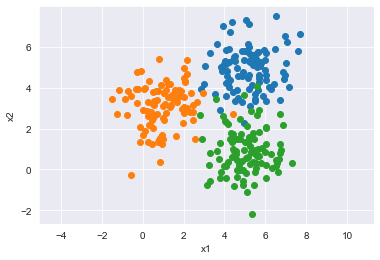

In [26]:
plt.scatter(x1a, x2a)
plt.scatter(x1b, x2b)
plt.scatter(x1c, x2c)

plt.axis('equal')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [27]:
x1 = np.concatenate([x1a, x1b, x1c])
x2 = np.concatenate([x2a, x2b, x2c])

In [28]:
print(len(x1), len(x2))

300 300


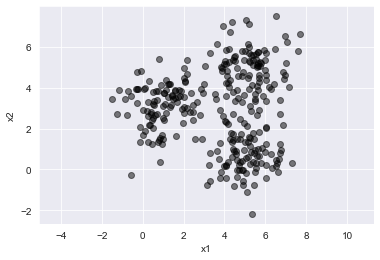

In [31]:
plt.scatter(x1, x2, alpha=0.5, color='k')
plt.axis('equal')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [33]:
X = pd.DataFrame({'x1':x1, 'x2':x2})
X.head()

,x1,x2
0,7.706850,6.606780
1,5.628133,3.884290
2,5.907969,3.614621
3,5.503826,3.670340
4,5.651118,5.041460


## II. K-Means & Euclidean Distances

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=123)

In [37]:
clustered_data = X.copy()
clustered_data['cluster'] = kmeans.predict(X)

In [38]:
clustered_data.head()

,x1,x2,cluster
0,7.706850,6.606780,0
1,5.628133,3.884290,0
2,5.907969,3.614621,0
3,5.503826,3.670340,0
4,5.651118,5.041460,0


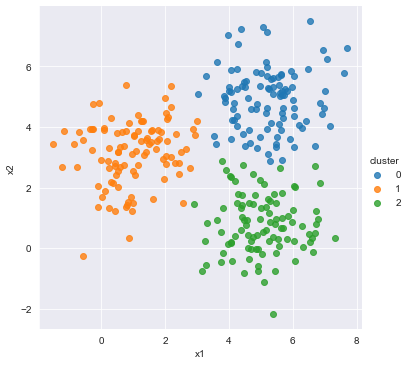

In [47]:
sns.lmplot(x='x1', y='x2', hue='cluster', data=clustered_data, fit_reg=False)
plt.show()

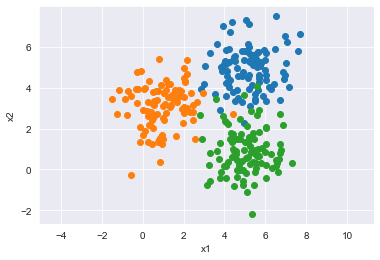

In [50]:
plt.scatter(x1a, x2a)
plt.scatter(x1b, x2b)
plt.scatter(x1c, x2c)

plt.axis('equal')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

## III. Iterations

In [51]:
def fit_and_plot_kmeans(model, X):
    model.fit(X)
    
    cluster_data = X.copy()
    cluster_data['cluster'] = model.predict(X)
    
    sns.lmplot(x='x1', y='x2', hue='cluster', data=cluster_data, fit_reg=False)
    
    plt.show()
    

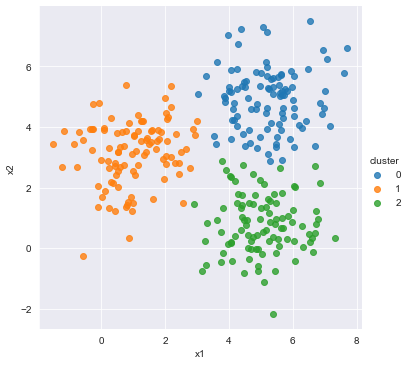

In [52]:
kmeans = KMeans(n_clusters=3, random_state=123)
fit_and_plot_kmeans(kmeans, X)

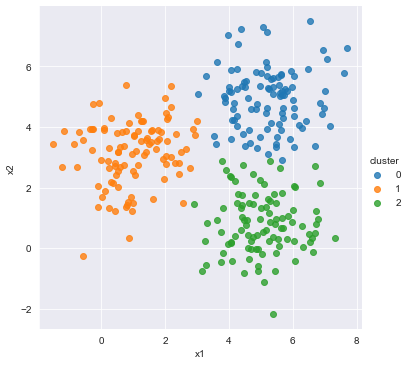

In [53]:
kmeans = KMeans(n_clusters=3, random_state=123, max_iter=1)
fit_and_plot_kmeans(kmeans, X)

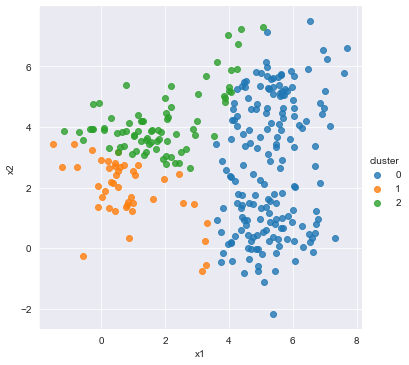

In [56]:
kmeans = KMeans(n_clusters=3, random_state=123, max_iter=1, init='random', n_init=1)
fit_and_plot_kmeans(kmeans, X)

Iteration 1


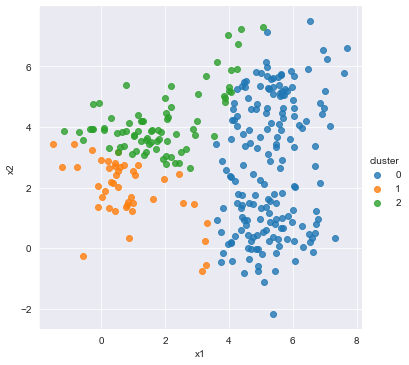

Iteration 2


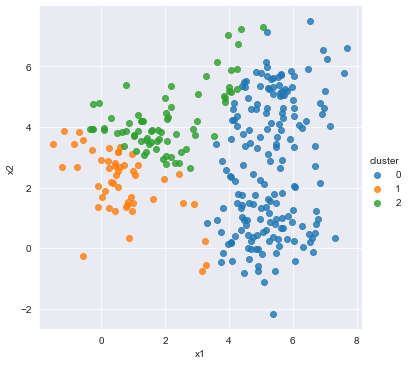

Iteration 3


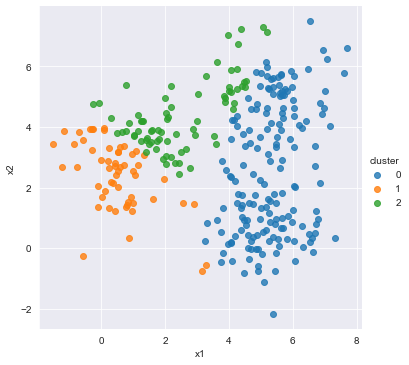

Iteration 4


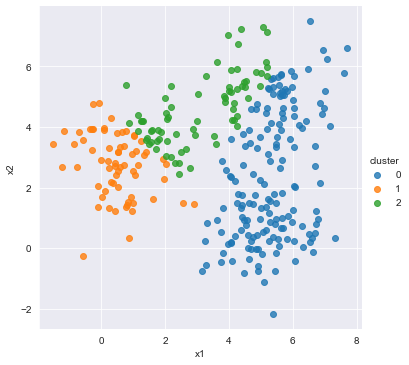

Iteration 5


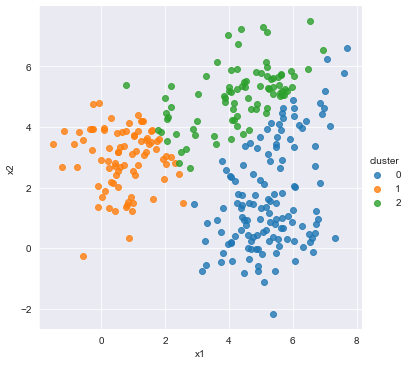

Iteration 6


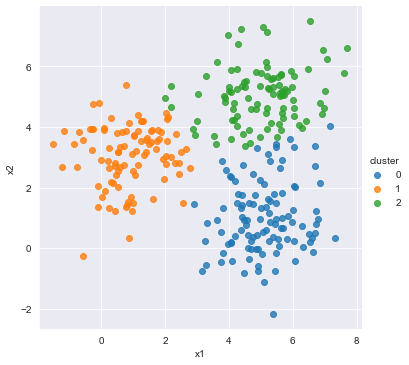

Iteration 7


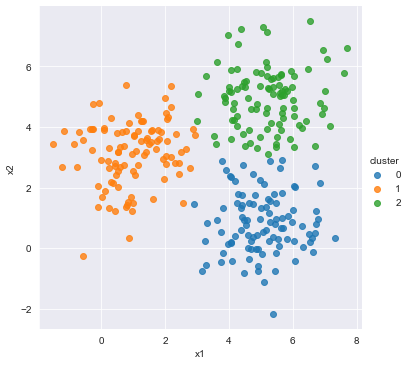

Iteration 8


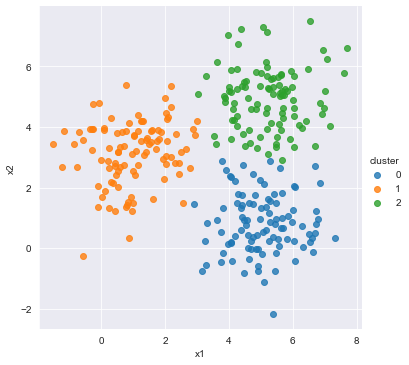

Iteration 9


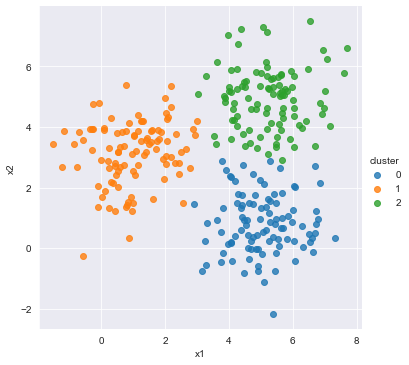

Iteration 10


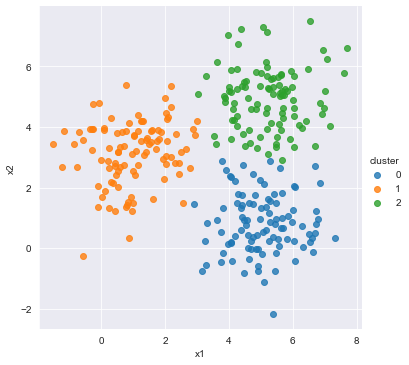

In [58]:
for itr in range(1, 11):
    print(f'Iteration {itr}')
    
    kmeans = KMeans(n_clusters=3, random_state=123, max_iter=itr, init='random', n_init=1)
    fit_and_plot_kmeans(kmeans, X)

## IV. Number of Clusters

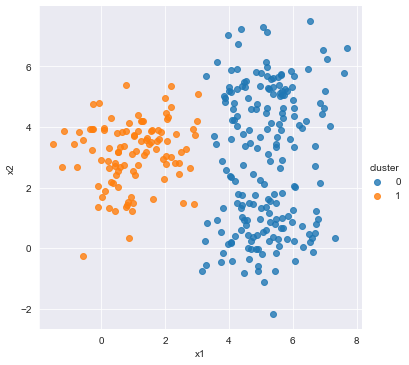

In [59]:
kmeans = KMeans(n_clusters=2, random_state=123)
fit_and_plot_kmeans(kmeans, X)

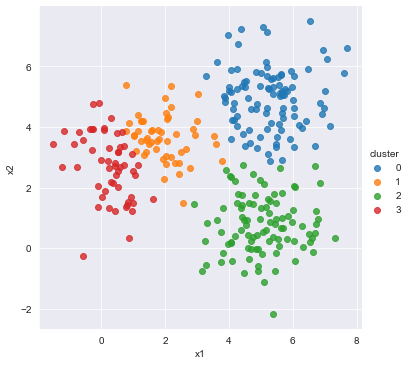

In [60]:
kmeans = KMeans(n_clusters=4, random_state=123)
fit_and_plot_kmeans(kmeans, X)

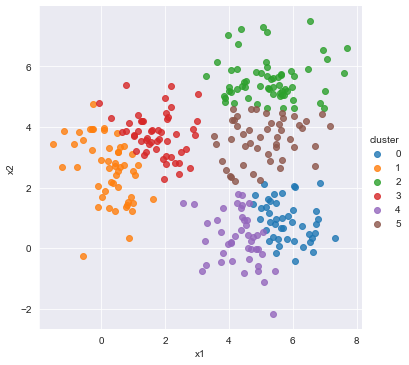

In [63]:
kmeans = KMeans(n_clusters=6, random_state=123)
fit_and_plot_kmeans(kmeans, X)

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 4.1 - Simulation: Overlapping Clusters</span>

In the Coding Section, we simulated a dataset with observations generated from 3 underlying clusters. Now, we're going to repeat that exercise, but this time we're going to see the implications of clusters that partially overlap.

Like in the Coding Section, we're going to simulate observations with two features, $x_1$ and $x_2$. But this time, we're going to generate them from bivariate normal distributions with standard deviation 1, **centered at 3 new centroids:** $(3, 5)$, $(3, 3)$, and $(3, 1)$.

#### A.) First, generate 100 observations centered around $(3, 5)$. Call it Cluster A.
* Set the random seed 

In [64]:
np.random.seed(101)
x1a = np.random.normal(3,1, 100)
x2a = np.random.normal(5,1, 100)

#### B.) Next, generate 100 observations centered around $(3, 3)$. Call it Cluster B.
* Set the random seed to 102.

In [65]:
np.random.seed(102)
x1b = np.random.normal(3,1, 100)
x2b = np.random.normal(3,1, 100)

#### C.) Next, generate 100 observations centered around $(3, 1)$. Call it Cluster C.
* Set the random seed to 103.

In [66]:
np.random.seed(103)
x1c = np.random.normal(3,1, 100)
x2c = np.random.normal(1,1, 100)

#### D.) Plot your newly simulated dataset. Represent each underlying cluster as a different color.
* What do you notice about the clusters?

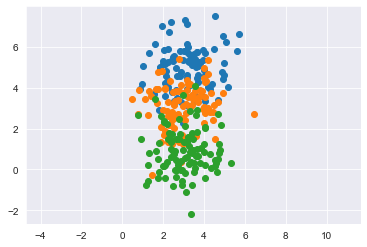

In [68]:
plt.scatter(x1a, x2a)
plt.scatter(x1b, x2b)
plt.scatter(x1c, x2c)
plt.axis('equal')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="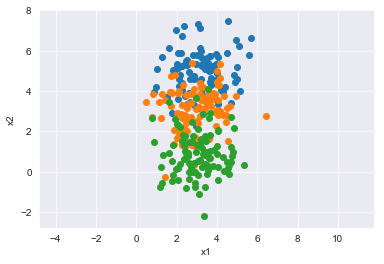&#10;">

#### E.) Combine the generated arrays into actual features, $x_1$ and $x_2$, that we would encounter out in the wild. Then, plot your unlabeled data.
* Combine <code style="color:steelblue">x1a</code>, <code style="color:steelblue">x1a</code>, and <code style="color:steelblue">x1a</code> into a single <code style="color:steelblue">x1</code> array.
* Combine <code style="color:steelblue">x2a</code>, <code style="color:steelblue">x2a</code>, and <code style="color:steelblue">x2a</code> into a single <code style="color:steelblue">x2</code> array.
* You should end up with two arrays of 300 values each.

300 300


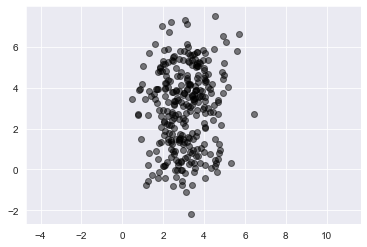

In [71]:
x1 = np.concatenate([x1a, x1b, x1c])
x2 = np.concatenate([x2a, x2b, x2c])
print(len(x1), len(x2))

plt.scatter(x1, x2, alpha=0.5, color='k')
plt.axis('equal')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="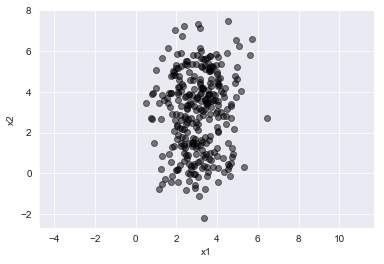&#10;">

#### F.) And finally, before proceeding, let's just create a single features dataframe <code>X</code>. Display the first 5 rows.

In [72]:
X = pd.DataFrame({'x1':x1, 'x2':x2})
X.head()

,x1,x2
0,5.706850,6.606780
1,3.628133,3.884290
2,3.907969,3.614621
3,3.503826,3.670340
4,3.651118,5.041460


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x1</th>
      <th>x2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.706850</td>
      <td>6.606780</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3.628133</td>
      <td>3.884290</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3.907969</td>
      <td>3.614621</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3.503826</td>
      <td>3.670340</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3.651118</td>
      <td>5.041460</td>
    </tr>
  </tbody>
</table>

## <span style="color:RoyalBlue">Exercise 4.2 - K-Means Model</span>

As we'll see in the next module, one of the key factors in clustering models is the set of input features you decide to use. At the end of the day, there aren't comparable **automatic feature selection** methods (e.g. random forests and regularization) in clustering algorithms because there's no target variable to model against and calculate "error."

Therefore, it's especially important for the practictioner to be discerning when deciding which input features to use. In the best case, including an irrelevant feature won't affect the model much. In the worst case, it could make the clusters worse by forcing the algorithm to factor useless features into the distance calculations.

#### A.) To see this point, fit and plot a 3-cluster K-Means model on the newly simulated dataset.
* Feel free to use the <code>fit_and_plot_kmeans()</code> helper function from earlier.
* What do you notice about the clusters? Which input feature(s) are most relevant?

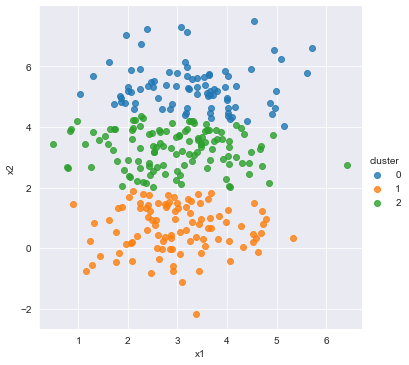

In [73]:
kmeans = KMeans(n_clusters=3, random_state=123)
fit_and_plot_kmeans(kmeans, X)

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="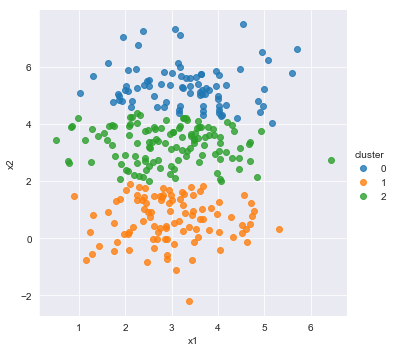&#10;">

As you can see, only $x_2$ appears to influence the clusters. If we think back to the simulation methodology, this makes a ton of sense. Remember, we generated observations centered at 3 new centroids: $(3, 5)$, $(3, 3)$, and $(3, 1)$.

Look closely at those centroids. Notice any pattern with their $x_1$ values? **That's right, the $x_1$ values of the centroids were all at 3.** That means including $x_1$ as an input feature wouldn't help our model at all.

#### B.) Let's prove it. Create a new <code>X_reduced</code> by dropping $x_1$ from <code>X</code>.

In [74]:
X_reduced = X.drop('x1', axis=1)


#### C.) Now, fit and plot a 3-cluster K-Means model again, but this time use <code>X_reduced</code>.
* **Tip:** You will NOT be able to use the <code>fit_and_plot_kmeans()</code> helper function for this. Can you figure out why?
* **Hint:** You'll still need <code>x2</code> when plotting the visualization!

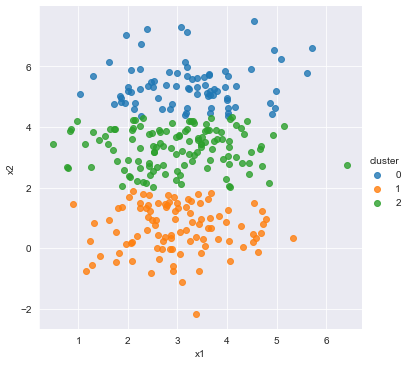

In [78]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X_reduced)
cluster_data = X.copy()
cluster_data['cluster'] = kmeans.predict(X_reduced)
sns.lmplot(x='x1', y='x2', hue='cluster', data=cluster_data, fit_reg=False)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="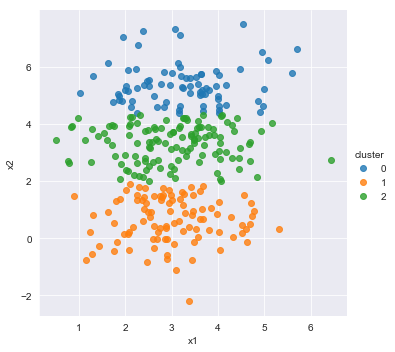&#10;">

As you can see, we end up with almost identical clusters when we use only $x_2$ compared to when we use both $x_1$ and $x_2$. This is a situation when including $x_1$ doesn't really hurt the model, but that won't always be the case. In real-world applications, the key is to **first determine the key factors you'd like to cluster along. We'll revisit this topic in the next module!**

Congratulations for making it through the Clustering Algorithms module! As a reminder, here are a few things you did in this module:
* You learned how the K-Means algorithm creates clusters based on Euclidean distances.
* You simulated clusters to explore the algorithm's properties.
* You saw how the centroids of clusters shift after each iteration of the algorithm.
* And you were introduced to the idea of pre-vetting input features, which we'll return to in the next module.

In the next module, we'll see how different feature sets lead to different clusters. We'll apply K-Means clustering to our project's analytical base table, threshold item features, and PCA item features.